In [ ]:
### Installing required packages and importing packages.

%pip install qiskit[visualization]
print("Finished first package")
%pip install qiskit_aer
print("Finished second package")
%pip install qiskit_ibm_runtime
print("Finished third package")
print("Required packages installed.")

In [3]:
# Importing packages.

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

In [6]:
# CNOT on Non-Adjacent Qubits Example
quantumReg = QuantumRegister(3, 'q')
classicalReg = ClassicalRegister(3, 'c')
qCircuit = QuantumCircuit(quantumReg, classicalReg)



# Protecting API Key

In [ ]:
# Protecting API Key with dotenv?
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Importing necessary packages from dotenv
import os
from dotenv import load_dotenv

In [ ]:
# 1. Load the .env file
# This command looks for the .env file in the current directory and loads
# the variables into the operating system's environment.
load_dotenv()

# 2. Access the variables using os.environ.get()
# Use .get() to prevent errors if the key isn't found.
my_api_key = os.environ.get("MY_API_KEY")
db_name = os.environ.get("DATABASE_NAME")
debug = os.environ.get("DEBUG_MODE")

# Selecting Hardware to run Quantum Circuits (ibm_torino)

The selected backend has a great impact on result of transpilation. This is due to different basis gates and different qubit connectivity layouts which vary with each computer.

By ensuring that we use the same backend each time, ibm_torino, we can ensure that the transpilation of our circuit will be somewhat consistent each time we transpile it. This is because ibm_torino will have the same qubit connectivity and basis gates each time we transpile. 

Qubit and gate coherence times, error rates, and other attributes usually shouldn't change too extremely unless something major is happening to the backend.

In [ ]:
# Selecting hardware backend to run on. The backend we use has great effect on final output of transpilation.

## Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(
    token = '',
    set_as_default = True,
    overwrite = True
    )

service = QiskitRuntimeService()

# Selects ibm_torino as the quantum computer to transpile the circuit for.
service = QiskitRuntimeService(channel="ibm_quantum_platform")
backend = service.backend("ibm_torino")
# Basis Gates of ibm_torino: ['cz', 'id', 'rx', 'rz', 'rzz', 'sx', 'x']
print(backend.name)
# This should print out "ibm_torino" as our selected backend.

## Get the target object for our selected backend: ibm_torino.
target = backend.target
# The target object contains all the information about the qubit connectivity (coupling map), and the basis gates available.
# It also contains information about gate error rates, gate duration, and coherence times of specific qubits and gates.

# This puts all the information that the target object for ibm_torino contains in a text file.
file_path = "ibm_torino_target_info.txt"

''' Used to write target info to ibm_torino_target_info.txt file
try: 
    with open(file_path, "w", encoding="utf-8") as file_object:
        file_object.write(str(target))
    print(f"Target information written to '{file_path}'")
except IOError as e:
    print(f"An error occurred while writing to the file: {e}")
'''
''

qiskit_runtime_service.__init__:WARNING:2025-11-17 18:56:59,321: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: QiskitFallFest2025. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.__init__:WARNING:2025-11-17 18:57:03,621: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: QiskitFallFest2025. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:

ibm_torino


' Used to write target info to ibm_torino_target_info.txt file\ntry: \n    with open(file_path, "w", encoding="utf-8") as file_object:\n        file_object.write(str(target))\n    print(f"Target information written to \'{file_path}\'")\nexcept IOError as e:\n    print(f"An error occurred while writing to the file: {e}")\n'

# Target specifications of ibm_torino
### Basis Gates of ibm_torino: ['cz', 'id', 'rx', 'rz', 'rzz', 'sx', 'x']

![CouplingMap of IBM_Torino.png](<attachment:CouplingMap of IBM_Torino.png>) 

### Qubit Connectivity of ibm_torino (CouplingMap)
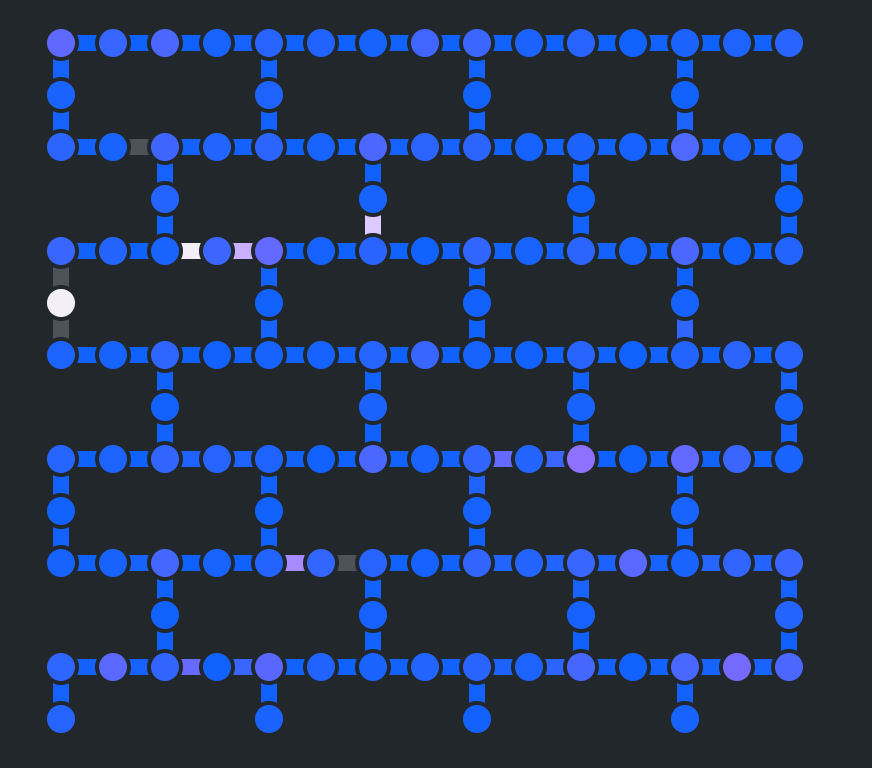

# Exploring Tra

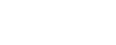

In [20]:
m = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa_circuit = pm.run(qCircuit)
qc_isa_circuit.draw(output="mpl", idle_wires=False, style="iqp")